## Identity the buying Pattern to increase sales - Association with items.

Click here...[Dataset](https://github.com/thisarakaushan/Machine-Learning-Bootcamp/blob/main/datasets/store_data.csv)

## Requirements

In [1]:
!pip install pyECLAT

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### APRIORI vs ECLAT(Equivalence Class Clsutering and bottom-up Lattice Travesal)

* ```Apriori algortithm``` works in a horizontal sense imitating the Breath-First Search of a graph but ```ECLAT algorithm``` works in a vertical manner just like the Depth-First Search of a graph.
* The ECLAT algorithm is typicallay faster than the Apriori algorithm.
* The ECLAT algorithm does not invole the repeates scanning of the data to compute the individual support values - Requires less time.
---
* Disadvantage - Suitable for less data.

### Measures

1. ```Support``` - signifies popularity of the item.
    - supp(bread) = no. of transaction of bread/ Total no. of transaction

2. ```Confidence``` - signifies the likelohood of butter purchased when breads is purchased.
    - Conf(bread - butter) = supp(Union of the bread and butter)/ supp(bread)

### Steps:

1. Database in Vertical format, itemset be List of items.
2. Itemset generated by intersection of 1. Itemset be List of items.
3. Itemset generated by intersection of 2.
4. Itemset generated by intersection of 3.
5. Taking the itemset which is having high value than the threshold confidence level.

## Import the libraries

In [2]:
import pandas as pd

## Import dataset from local directory

In [3]:
dataset = pd.read_csv('store_data.csv', header = None)

In [4]:
dataset.shape

(7501, 20)

In [5]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Traing APRIORI

In [6]:
from pyECLAT import ECLAT

eclat_instance = ECLAT(data = dataset, verbose = True) # verbose = True to see the loading bar

100%|██████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 1815.80it/s]


## Results

In [7]:
result = eclat_instance.support(min_support = None)

result

{'whole wheat rice': 0.058525529929342755,
 'body spray': 0.011465137981602452,
 'turkey': 0.06252499666711105,
 'parmesan cheese': 0.01986401813091588,
 'cauliflower': 0.004799360085321957,
 'pet food': 0.006532462338354886,
 'butter': 0.030129316091187842,
 'grated cheese': 0.0523930142647647,
 'oil': 0.023063591521130515,
 'chicken': 0.05999200106652446,
 'melons': 0.011998400213304892,
 'cream': 0.0009332089054792694,
 'brownies': 0.03372883615517931,
 'extra dark chocolate': 0.011998400213304892,
 'eggs': 0.17970937208372217,
 'salt': 0.009198773496867084,
 'avocado': 0.03332888948140248,
 'ground beef': 0.09825356619117451,
 'frozen smoothie': 0.06332489001466471,
 'barbecue sauce': 0.010798560191974404,
 'fresh tuna': 0.022263698173576856,
 'cider': 0.010531929076123183,
 'salmon': 0.04252766297826956,
 'cottage cheese': 0.03186241834422077,
 'candy bars': 0.009732035728569524,
 'green tea': 0.13211571790427942,
 'rice': 0.018797493667511,
 'cereals': 0.025729902679642713,
 'pic

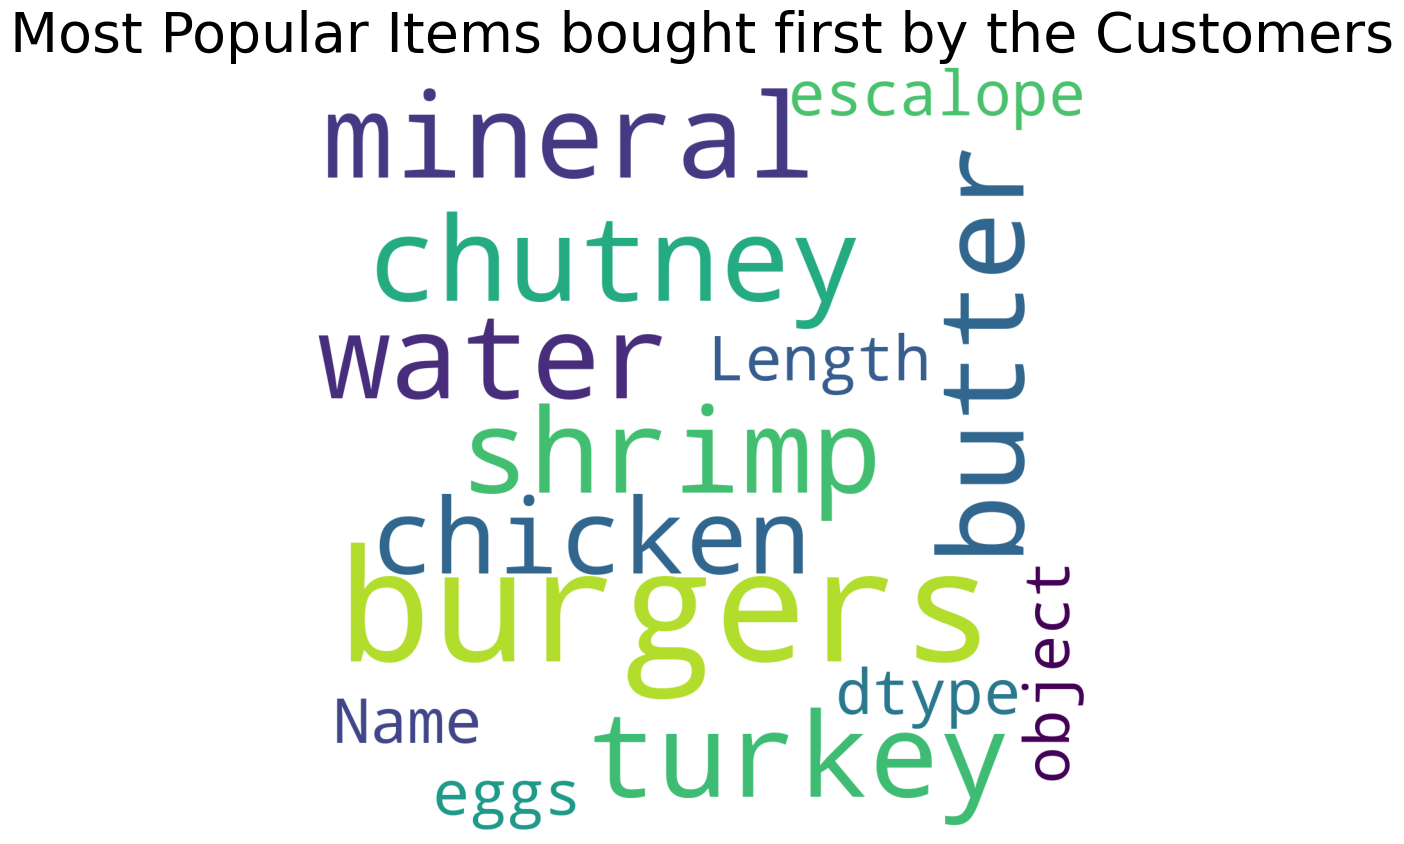

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(dataset[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()